In [1]:
import cv2 # computer vision library

import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # for loading in images

%matplotlib inline

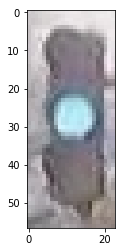

In [2]:
image = cv2.imread("light2.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)

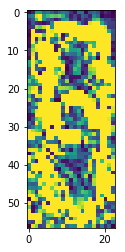

In [3]:
gradX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=-1)

# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)
plt.imshow(gradient)

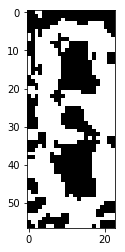

In [4]:
blurred = cv2.blur(gradient, (3, 3))
(_, thresh) = cv2.threshold(blurred, 168, 255, cv2.THRESH_BINARY)

plt.imshow(thresh, cmap="gray")

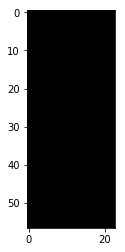

In [5]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 25))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
# plt.imshow(closed)
plt.imshow(closed, cmap="gray")

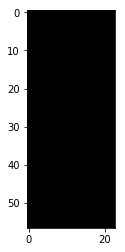

In [6]:
closed = cv2.erode(closed, None, iterations=4)
closed = cv2.dilate(closed, None, iterations=4)
plt.imshow(closed, cmap="gray")

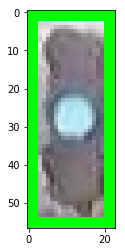

In [7]:
(image1,cnts, hierarchy) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
c = sorted(cnts, key=cv2.contourArea, reverse=True)[0]

# compute the rotated bounding box of the largest contour
rect = cv2.minAreaRect(c)
box = np.int0(cv2.boxPoints(rect))

# draw a bounding box arounded the detected barcode and display the image
cv2.drawContours(image, [box], -1, (0, 255, 0), 3)
plt.imshow(image)

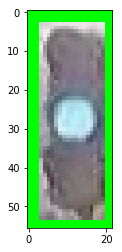

In [8]:
Xs = [i[0] for i in box]
Ys = [i[1] for i in box]
x1 = min(Xs)
x2 = max(Xs)
y1 = min(Ys)
y2 = max(Ys)
hight = y2 - y1
width = x2 - x1
cropImg = image[y1:y1+hight, x1:x1+width]
plt.imshow(cropImg,cmap="gray")